In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
cicero_df = pd.read_csv('../data/cicero_data_with_genre.csv')

In [4]:
cicero_df = cicero_df.drop(columns=['Unnamed: 0'])

In [5]:
cicero_speeches = cicero_df.loc[cicero_df['genre'] == 'speeches']
rows_to_drop = ['in catilinam', 'de lege agraria', 'in verrem', 'philippicae']
cicero_speeches = cicero_speeches.loc[~cicero_speeches['title'].isin(rows_to_drop)]

In [10]:
cicero_letters = cicero_df[cicero_df['genre'] == 'letters']
rows_to_drop = ['epistulae ad atticum', 'epistulae ad brutum']
cicero_letters = cicero_letters.loc[~cicero_letters['title'].isin(rows_to_drop)]

In [13]:
cicero_rhetoric = cicero_df[cicero_df['genre'] == 'rhetoric']

In [15]:
cicero_philosophy = cicero_df[cicero_df['genre'] == 'philosophy']

In [16]:
cicero_works = cicero_speeches.append(cicero_letters).append(cicero_rhetoric).append(cicero_philosophy)
cicero_works.head()

,genre,title,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),double/molossus-cretic pure double-cretic (-u--ux),double/molossus-cretic pure molossus-cretic (----ux),double/molossus-cretic 1 res (uuu--ux),double/molossus-cretic 1 res (-uuu-ux),...,hypodochmiac (-u-ux),hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),misc_clausulae,author
8,speeches,de domo sua,137,16,51,11,61,35,11,4,...,42,2,1,52,13,14,5,1,17,cicero
11,speeches,de haruspicum responso,82,8,37,9,26,26,4,2,...,12,0,1,41,11,2,2,1,2,cicero
15,speeches,de lege agraria 1,23,2,6,4,12,13,2,0,...,10,1,0,13,0,1,0,0,5,cicero
16,speeches,de lege agraria 2,131,8,26,10,35,38,4,3,...,38,1,0,49,15,16,5,0,11,cicero
17,speeches,de lege agraria 3,13,2,3,3,11,9,1,0,...,4,1,0,9,1,1,0,0,5,cicero


In [17]:
X = cicero_works.drop(columns=['genre', 'title', 'author'])
X = StandardScaler().fit_transform(X)

/Users/tyler/Projects/latin-prose-rhythm/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tyler/Projects/latin-prose-rhythm/venv/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
pca_2d = PCA(n_components=2)
pca_2d_components = pca_2d.fit_transform(X)
pca_2d_df = pd.DataFrame(data=pca_2d_components, columns=['Component 1', 'Component 2'])
pca_2d_df['title'] = cicero_works['title'].values
pca_2d_df['genre'] = cicero_works['genre'].values
pca_2d_df.head()

,Component 1,Component 2,title,genre
0,-0.406555,-0.780238,de domo sua,speeches
1,-1.779289,-0.362595,de haruspicum responso,speeches
2,-2.995341,0.123712,de lege agraria 1,speeches
3,-1.130233,-0.272588,de lege agraria 2,speeches
4,-3.137327,0.243832,de lege agraria 3,speeches


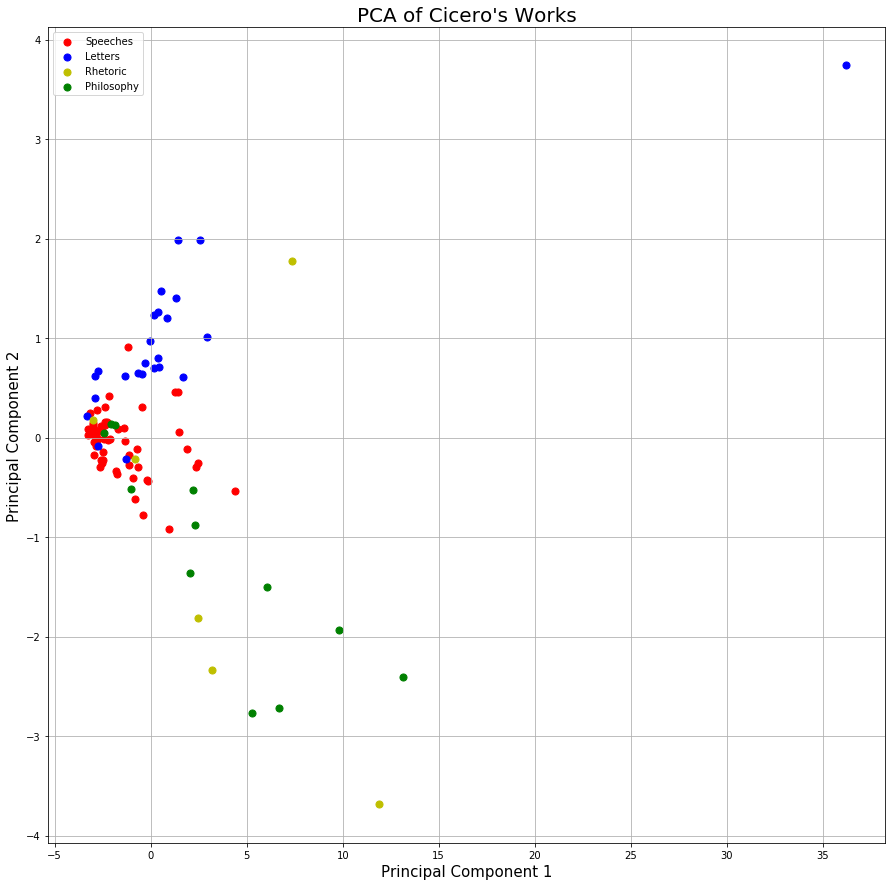

In [19]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of Cicero\'s Works', fontsize = 20)

speeches = pca_2d_df.loc[pca_2d_df['genre'] == 'speeches']
letters = pca_2d_df.loc[pca_2d_df['genre'] == 'letters']
rhetoric = pca_2d_df.loc[pca_2d_df['genre'] == 'rhetoric']
philosophy = pca_2d_df.loc[pca_2d_df['genre'] == 'philosophy']

ax.scatter(x=speeches['Component 1'], y=speeches['Component 2'], c = 'r', s = 50)
ax.scatter(x=letters['Component 1'], y=letters['Component 2'], c = 'b', s = 50)
ax.scatter(x=rhetoric['Component 1'], y=rhetoric['Component 2'], c = 'y', s = 50)
ax.scatter(x=philosophy['Component 1'], y=philosophy['Component 2'], c = 'g', s = 50)

ax.legend(['Speeches', 'Letters', 'Rhetoric', 'Philosophy'])
ax.grid()
plt.show()

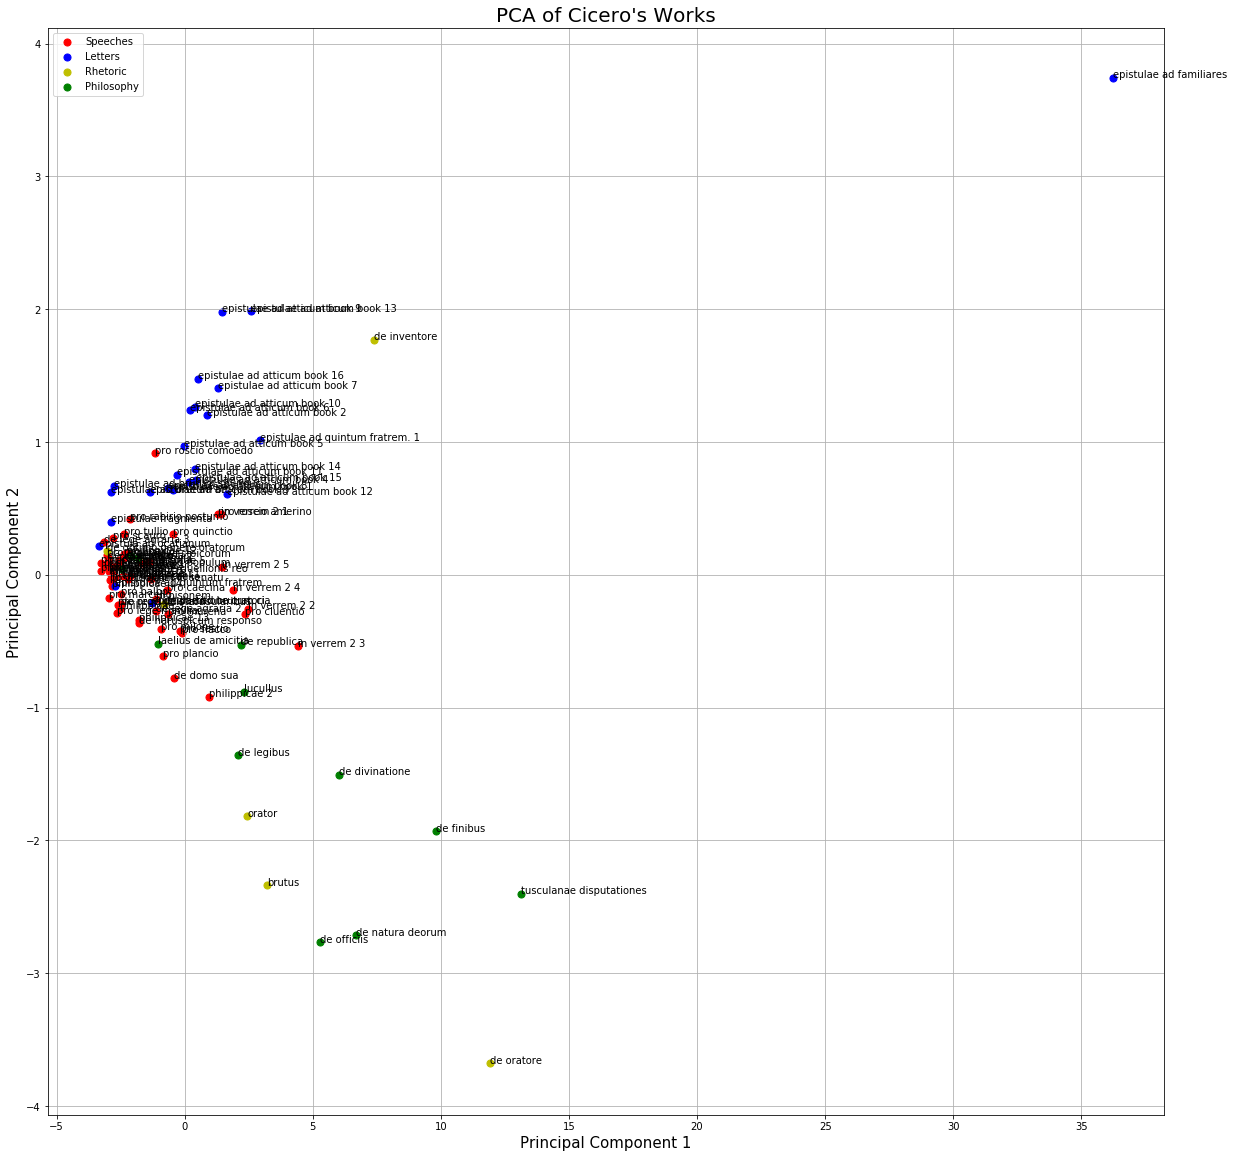

In [21]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of Cicero\'s Works', fontsize = 20)

speeches = pca_2d_df.loc[pca_2d_df['genre'] == 'speeches']
letters = pca_2d_df.loc[pca_2d_df['genre'] == 'letters']
rhetoric = pca_2d_df.loc[pca_2d_df['genre'] == 'rhetoric']
philosophy = pca_2d_df.loc[pca_2d_df['genre'] == 'philosophy']

ax.scatter(x=speeches['Component 1'], y=speeches['Component 2'], c = 'r', s = 50)
ax.scatter(x=letters['Component 1'], y=letters['Component 2'], c = 'b', s = 50)
ax.scatter(x=rhetoric['Component 1'], y=rhetoric['Component 2'], c = 'y', s = 50)
ax.scatter(x=philosophy['Component 1'], y=philosophy['Component 2'], c = 'g', s = 50)

for i in range(pca_2d_df.shape[0]):
    ax.annotate(pca_2d_df['title'][i], (pca_2d_df['Component 1'][i], pca_2d_df['Component 2'][i]))

ax.legend(['Speeches', 'Letters', 'Rhetoric', 'Philosophy'])
ax.grid()
plt.show()

In [41]:
tsne_2d = TSNE(n_components=2, perplexity=35)
tsne_2d_components = tsne_2d.fit_transform(X)
tsne_2d_df = pd.DataFrame(data=tsne_2d_components, columns=['Component 1', 'Component 2'])
tsne_2d_df['title'] = cicero_works['title'].values
tsne_2d_df['genre'] = cicero_works['genre'].values
tsne_2d_df.head()

,Component 1,Component 2,title,genre
0,0.886234,5.969477,de domo sua,speeches
1,-0.605046,4.064787,de haruspicum responso,speeches
2,-3.117411,0.231706,de lege agraria 1,speeches
3,0.626680,4.622233,de lege agraria 2,speeches
4,-3.402858,0.082096,de lege agraria 3,speeches


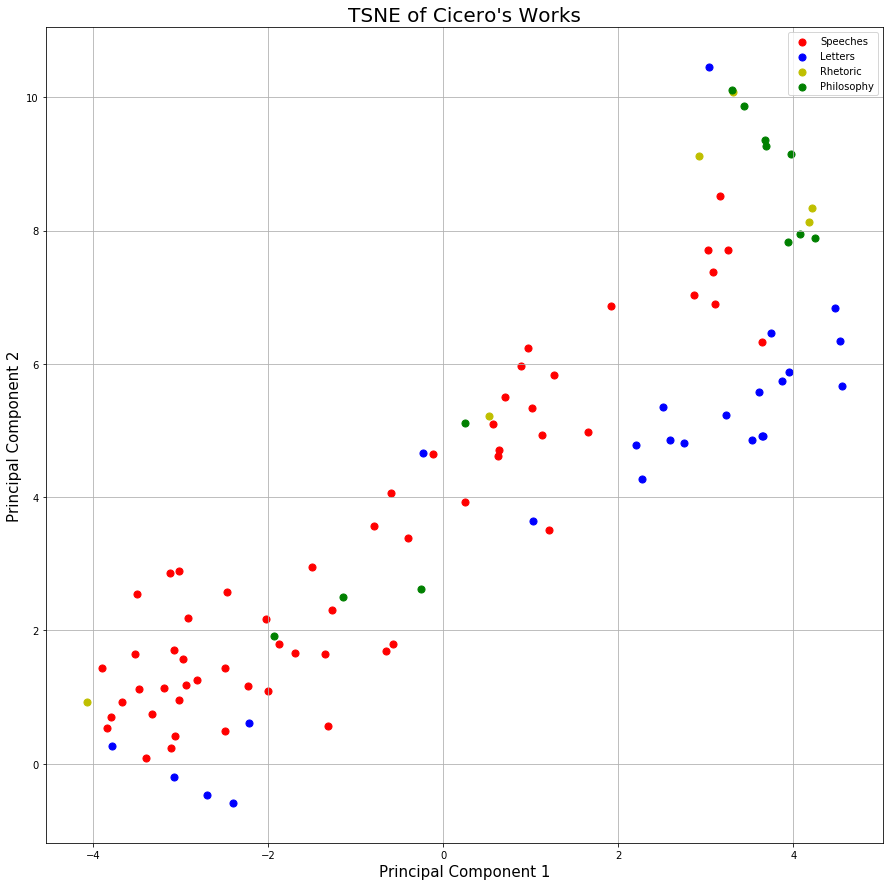

In [42]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TSNE of Cicero\'s Works', fontsize = 20)

speeches = tsne_2d_df.loc[pca_2d_df['genre'] == 'speeches']
letters = tsne_2d_df.loc[pca_2d_df['genre'] == 'letters']
rhetoric = tsne_2d_df.loc[pca_2d_df['genre'] == 'rhetoric']
philosophy = tsne_2d_df.loc[pca_2d_df['genre'] == 'philosophy']

ax.scatter(x=speeches['Component 1'], y=speeches['Component 2'], c = 'r', s = 50)
ax.scatter(x=letters['Component 1'], y=letters['Component 2'], c = 'b', s = 50)
ax.scatter(x=rhetoric['Component 1'], y=rhetoric['Component 2'], c = 'y', s = 50)
ax.scatter(x=philosophy['Component 1'], y=philosophy['Component 2'], c = 'g', s = 50)

ax.legend(['Speeches', 'Letters', 'Rhetoric', 'Philosophy'])
ax.grid()
plt.show()

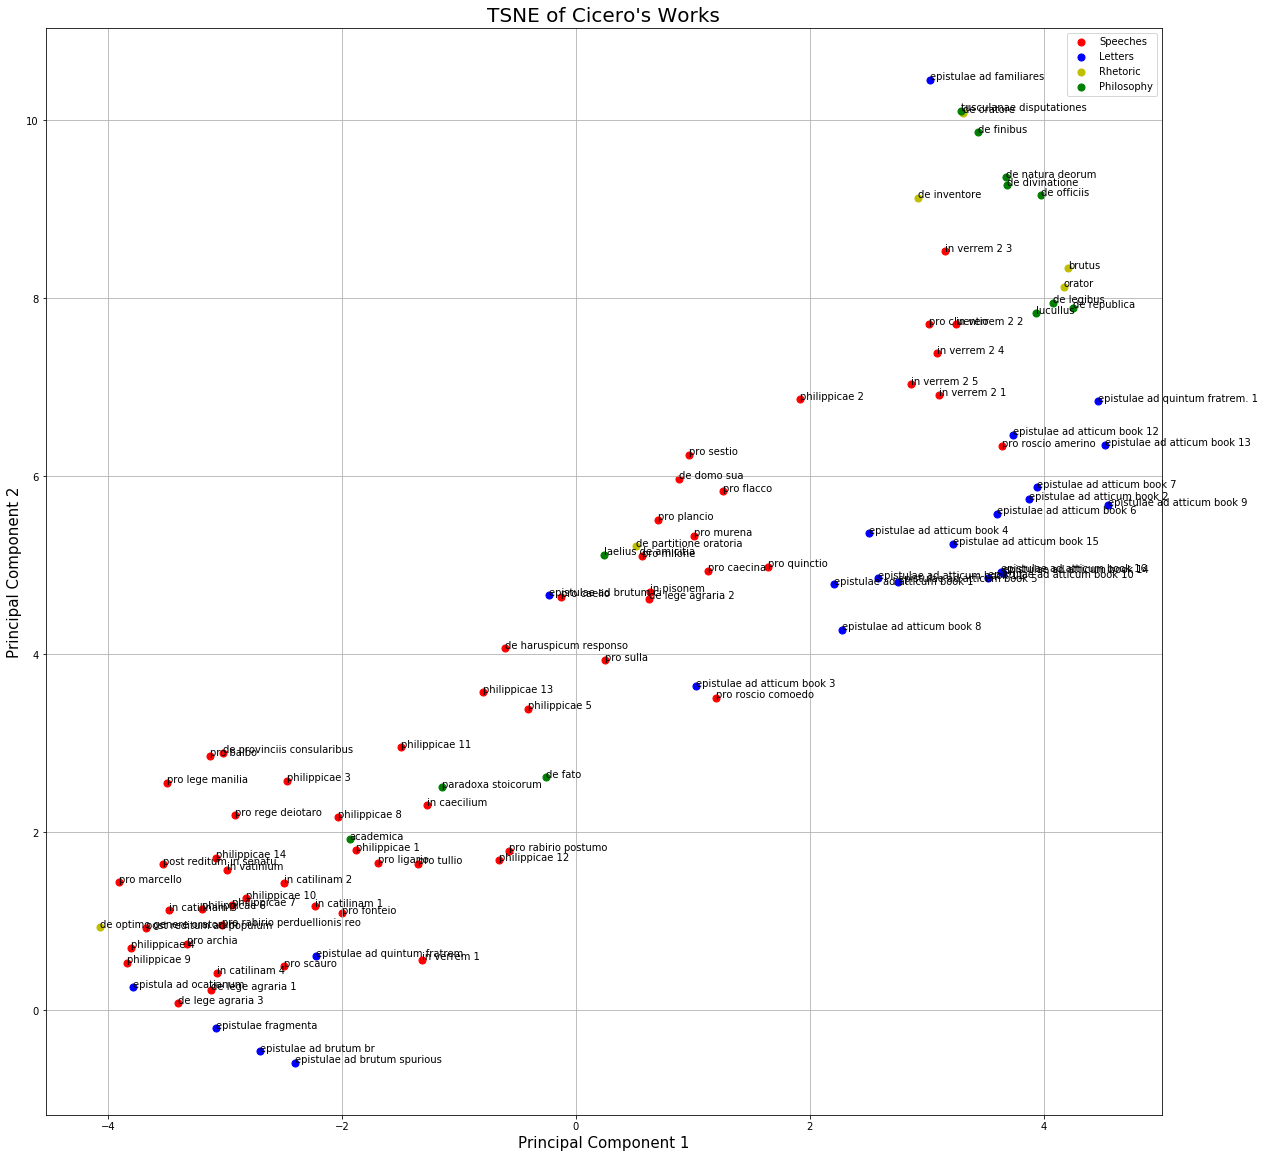

In [43]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TSNE of Cicero\'s Works', fontsize = 20)

speeches = tsne_2d_df.loc[pca_2d_df['genre'] == 'speeches']
letters = tsne_2d_df.loc[pca_2d_df['genre'] == 'letters']
rhetoric = tsne_2d_df.loc[pca_2d_df['genre'] == 'rhetoric']
philosophy = tsne_2d_df.loc[pca_2d_df['genre'] == 'philosophy']

ax.scatter(x=speeches['Component 1'], y=speeches['Component 2'], c = 'r', s = 50)
ax.scatter(x=letters['Component 1'], y=letters['Component 2'], c = 'b', s = 50)
ax.scatter(x=rhetoric['Component 1'], y=rhetoric['Component 2'], c = 'y', s = 50)
ax.scatter(x=philosophy['Component 1'], y=philosophy['Component 2'], c = 'g', s = 50)

for i in range(tsne_2d_df.shape[0]):
    ax.annotate(tsne_2d_df['title'][i], (tsne_2d_df['Component 1'][i], tsne_2d_df['Component 2'][i]))

ax.legend(['Speeches', 'Letters', 'Rhetoric', 'Philosophy'])
ax.grid()
plt.show()